# Create DataLoader

## Normal data loader

In [8]:
import torch
from utils.dataset import EEGDataset
from utils.preprocessing import EEGDataProcessor
from torchvision.transforms import Compose
from torch.utils.data import random_split
from torch.utils.data import DataLoader

torch.manual_seed(882096886)

pp = EEGDataProcessor()

pp.HIGH_PASS_BOTTOM = 3    # [Hz]
pp.HIGH_PASS_TOP = 5       # [Hz]

pp.LOW_PASS_BOTTOM = 35    # [Hz]
pp.LOW_PASS_TOP = 40       # [Hz]

transforms = Compose([
    pp.correct_offset,
    pp.amplitude_conversion,
    pp.filter,
    pp.downsample,
    pp.normalize
])

dataset = EEGDataset("../dataset/pawel_splited", transforms, n_classes=3)

train_set, test_set, validation_set = random_split(dataset, [0.7, 0.2, 0.1])

train_loader = DataLoader(train_set, batch_size=32, num_workers=4, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, num_workers=4)
val_loader = DataLoader(validation_set, batch_size=32, num_workers=4)

In [9]:
len(dataset)

1008

In [50]:
x = dataset.__getitem__(7)[0]

In [51]:
x.shape

(16, 1024)

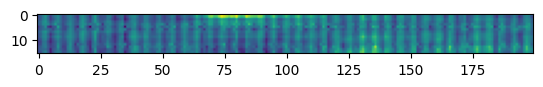

In [52]:
import matplotlib.pyplot as plt

plt.imshow(x[:, 200:400])
plt.show()

In [53]:
for i, c in enumerate(x):
    c += i*10

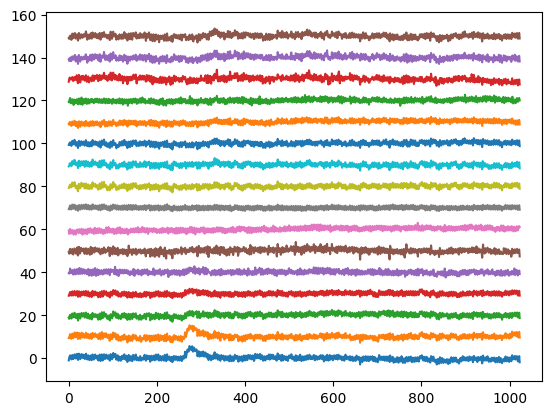

In [54]:
plt.plot(x.transpose())
plt.show()

In [7]:
dataset.n_classes

3

# Models

In [55]:
import torchmetrics
import torch
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F
from torch.nn.functional import binary_cross_entropy, one_hot
import lightning.pytorch as pl

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg

## Inception

In [56]:
from models.EEGInception import EEGInception

inception = EEGInception(
    input_time = 4000,
    fs = pp.DOWNSAMPLED_FREQ,
    ncha = 16,
    n_classes=dataset.n_classes,
)

In [57]:
from lightning.pytorch.loggers import TensorBoardLogger

logger = TensorBoardLogger("tb_logs", name="eeg_inception")

trainer = pl.Trainer(max_epochs=100, logger=logger, log_every_n_steps=10)
trainer.fit(inception, train_loader, val_loader)
trainer.test(inception, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type                      | Params
--------------------------------------------------------------
0  | accuracy_train | MulticlassPrecision       | 0     
1  | accuracy_test  | MulticlassPrecision       | 0     
2  | accuracy_val   | MulticlassPrecision       | 0     
3  | f1_train       | MulticlassF1Score         | 0     
4  | f1_test        | MulticlassF1Score         | 0     
5  | f1_val         | MulticlassF1Score         | 0     
6  | confmat        | MulticlassConfusionMatrix | 0     
7  | roc            | MultilabelROC             | 0     
8  | inception1     | ModuleList                | 2.7 K 
9  | avg_pool1      | AvgPool2d                 | 0     
10 | inception2     | ModuleList                | 21.6 K
11 | avg_pool2      | AvgPool2d                 | 0     
1

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.43922099471092224    │
│          test_f1          │    0.47029703855514526    │
│         test_loss         │    1.0850540399551392     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.0850540399551392,
  'test_acc': 0.43922099471092224,
  'test_f1': 0.47029703855514526}]

## EEGNet

In [6]:
from models.EEGNet import EEGNet

eegnet = EEGNet(n_classes=dataset.n_classes, fs=pp.DOWNSAMPLED_FREQ)

In [7]:
from lightning.pytorch.loggers import TensorBoardLogger

logger = TensorBoardLogger("tb_logs", name="eeg_net")

trainer = pl.Trainer(max_epochs=100, logger=logger, log_every_n_steps=10)
trainer.fit(eegnet, train_loader, val_loader)
trainer.test(eegnet, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type                      | Params
--------------------------------------------------------------
0  | accuracy_train | MulticlassPrecision       | 0     
1  | accuracy_test  | MulticlassPrecision       | 0     
2  | accuracy_val   | MulticlassPrecision       | 0     
3  | f1_train       | MulticlassF1Score         | 0     
4  | f1_test        | MulticlassF1Score         | 0     
5  | f1_val         | MulticlassF1Score         | 0     
6  | confmat        | MulticlassConfusionMatrix | 0     
7  | roc            | MultilabelROC             | 0     
8  | conv1          | Conv2d                    | 272   
9  | batchnorm1     | BatchNorm2d               | 32    
10 | padding1       | ZeroPad2d                 | 0     
11 | conv2          | Conv2d                    | 260   
1

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.46432268619537354    │
│          test_f1          │    0.48514851927757263    │
│         test_loss         │     1.057361364364624     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 1.057361364364624,
  'test_acc': 0.46432268619537354,
  'test_f1': 0.48514851927757263}]

## Transformer

In [9]:
import os
import numpy as np
import math
import random
import time
import scipy.io

from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchsummary import summary

import torch
import torch.nn.functional as F

from torch import nn
from torch import Tensor

from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce

import matplotlib.pyplot as plt
from torch.backends import cudnn


class PatchEmbedding(pl.LightningModule):
    def __init__(self, emb_size):
        # self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            nn.Conv2d(1, 2, (1, 51), (1, 1)),
            nn.BatchNorm2d(2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(2, emb_size, (16, 5), stride=(1, 5)),
            Rearrange('b e (h) (w) -> b (h w) e'),
        )
        self.cls_token = nn.Parameter(torch.randn(1, 1, emb_size))
        # self.positions = nn.Parameter(torch.randn((100 + 1, emb_size)))
        # self.positions = nn.Parameter(torch.randn((2200 + 1, emb_size)))

    def forward(self, x: Tensor) -> Tensor:
        b, _, _, _ = x.shape
        x = self.projection(x)
        cls_tokens = repeat(self.cls_token, '() n e -> b n e', b=b)

        # position
        # x += self.positions
        return x


class MultiHeadAttention(pl.LightningModule):
    def __init__(self, emb_size, num_heads, dropout):
        super().__init__()
        self.emb_size = emb_size
        self.num_heads = num_heads
        self.keys = nn.Linear(emb_size, emb_size)
        self.queries = nn.Linear(emb_size, emb_size)
        self.values = nn.Linear(emb_size, emb_size)
        self.att_drop = nn.Dropout(dropout)
        self.projection = nn.Linear(emb_size, emb_size)

    def forward(self, x: Tensor, mask: Tensor = None) -> Tensor:
        queries = rearrange(self.queries(x), "b n (h d) -> b h n d", h=self.num_heads)
        keys = rearrange(self.keys(x), "b n (h d) -> b h n d", h=self.num_heads)
        values = rearrange(self.values(x), "b n (h d) -> b h n d", h=self.num_heads)
        energy = torch.einsum('bhqd, bhkd -> bhqk', queries, keys)  # batch, num_heads, query_len, key_len
        if mask is not None:
            fill_value = torch.finfo(torch.float32).min
            energy.mask_fill(~mask, fill_value)

        scaling = self.emb_size ** (1 / 2)
        att = F.softmax(energy / scaling, dim=-1)
        att = self.att_drop(att)
        out = torch.einsum('bhal, bhlv -> bhav ', att, values)
        out = rearrange(out, "b h n d -> b n (h d)")
        out = self.projection(out)
        return out


class ResidualAdd(pl.LightningModule):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x


class FeedForwardBlock(nn.Sequential):
    def __init__(self, emb_size, expansion, drop_p):
        super().__init__(
            nn.Linear(emb_size, expansion * emb_size),
            nn.GELU(),
            nn.Dropout(drop_p),
            nn.Linear(expansion * emb_size, emb_size),
        )

class GELU(pl.LightningModule):
    def forward(self, input: Tensor) -> Tensor:
        return input*0.5*(1.0+torch.erf(input/math.sqrt(2.0)))


class TransformerEncoderBlock(nn.Sequential):
    def __init__(self,
                 emb_size,
                 num_heads=5,
                 drop_p=0.5,
                 forward_expansion=4,
                 forward_drop_p=0.5):
        super().__init__(
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                MultiHeadAttention(emb_size, num_heads, drop_p),
                nn.Dropout(drop_p)
            )),
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                FeedForwardBlock(
                    emb_size, expansion=forward_expansion, drop_p=forward_drop_p),
                nn.Dropout(drop_p)
            )
            ))


class TransformerEncoder(nn.Sequential):
    def __init__(self, depth, emb_size):
        super().__init__(*[TransformerEncoderBlock(emb_size) for _ in range(depth)])


class ClassificationHead(nn.Sequential):
    def __init__(self, emb_size, n_classes):
        super().__init__()
        self.clshead = nn.Sequential(
            Reduce('b n e -> b e', reduction='mean'),
            nn.LayerNorm(emb_size),
            nn.Linear(emb_size, n_classes)
        )

    def forward(self, x):
        out = self.clshead(x)
        return out
        # return x, out



class ViT(nn.Sequential):
    def __init__(self, emb_size=10, depth=3, n_classes=3, **kwargs):
        super().__init__(
            ResidualAdd(
                nn.Sequential(
                    nn.LayerNorm(2048),
                    channel_attention(),
                    nn.Dropout(0.5),
                )
            ),

            PatchEmbedding(emb_size),
            TransformerEncoder(depth, emb_size),
            ClassificationHead(emb_size, n_classes)
        )


class channel_attention(pl.LightningModule):
    def __init__(self, sequence_num=512, inter=30):
        super(channel_attention, self).__init__()
        self.sequence_num = sequence_num
        self.inter = inter
        self.extract_sequence = int(self.sequence_num / self.inter)  # You could choose to do that for less computation

        self.query = nn.Sequential(
            nn.Linear(16, 16),
            nn.LayerNorm(16),  # also may introduce improvement to a certain extent
            nn.Dropout(0.3)
        )
        self.key = nn.Sequential(
            nn.Linear(16, 16),
            nn.LayerNorm(16),
            nn.Dropout(0.3)
        )

        self.projection = nn.Sequential(
            nn.Linear(16, 16),
            nn.LayerNorm(16),
            nn.Dropout(0.3),
        )

        self.drop_out = nn.Dropout(0)
        self.pooling = nn.AvgPool2d(kernel_size=(1, self.inter), stride=(1, self.inter))

        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        temp = rearrange(x, 'b o c s->b o s c')
        temp_query = rearrange(self.query(temp), 'b o s c -> b o c s')
        temp_key = rearrange(self.key(temp), 'b o s c -> b o c s')

        channel_query = self.pooling(temp_query)
        channel_key = self.pooling(temp_key)

        scaling = self.extract_sequence ** (1 / 2)

        channel_atten = torch.einsum('b o c s, b o m s -> b o c m', channel_query, channel_key) / scaling

        channel_atten_score = F.softmax(channel_atten, dim=-1)
        channel_atten_score = self.drop_out(channel_atten_score)

        out = torch.einsum('b o c s, b o c m -> b o c s', x, channel_atten_score)
        '''
        projections after or before multiplying with attention score are almost the same.
        '''
        out = rearrange(out, 'b o c s -> b o s c')
        out = self.projection(out)
        out = rearrange(out, 'b o s c -> b o c s')
        return out


class Trans(pl.LightningModule):
    def __init__(self):
        super(Trans, self).__init__()
        self.model = ViT()

        self.accuracy_train = torchmetrics.Precision(task="multiclass", average='macro', num_classes=3)
        self.accuracy_test = torchmetrics.Precision(task="multiclass", average='macro', num_classes=3)
        self.accuracy_val = torchmetrics.Precision(task="multiclass", average='macro', num_classes=3)

        self.f1 = torchmetrics.F1Score(task="multiclass", num_classes=3)
        self.confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=3)
        self.roc = torchmetrics.ROC(task='multilabel', num_labels=3)
        
    def forward(self, x):
        x = torch.unsqueeze(x, 1)
        x = self.model(x)
        out = F.softmax(x, dim=-1)
        return out

    def configure_optimizers(self):
        optimizer = Adam(self.parameters(), lr=1e-3)
        return optimizer
  
    def training_step(self, batch, batch_idx):
        data, label_n = batch
        
        # get predictions
        output = self(data)

        # convert for loss calculation
        label = one_hot(label_n, num_classes=3)
    
        # calculate loss
        loss = binary_cross_entropy(output, label.to(torch.float32))
        self.log("train_loss", loss, on_step=True)

        # calculate f1 score
        self.f1.update(output, label_n)
        self.log('train_f1', self.f1)

        self.confmat.update(output, label_n)

        return loss

    def test_step(self, batch, batch_idx):
        data, label_n = batch
        
        # get predictions
        output = self(data)
        
        # convert for loss calculation
        label = one_hot(label_n, num_classes=3)
    
        # calculate loss
        loss = binary_cross_entropy(output, label.to(torch.float32))
        self.log("test_loss", loss)
                
        # calculate accuracy
        self.accuracy_test.update(output, label_n)
        self.log('test_acc', self.accuracy_test)

        # calculate f1 score
        self.f1.update(output, label_n)
        self.log('train_f1', self.f1)
    
    def validation_step(self, batch, batch_idx):
        data, label_n = batch
        
        # get predictions
        output = self(data)
        
        # convert for loss calculation
        label = one_hot(label_n, num_classes=3)
    
        # calculate loss
        loss = binary_cross_entropy(output, label.to(torch.float32))
        self.log("validation_loss", loss)
                
        # calculate accuracy
        self.accuracy_val.update(output, label_n)
        self.log('validation_acc', self.accuracy_val)

        # calculate f1 score
        self.f1.update(output, label_n)
        self.log('train_f1', self.f1, on_epoch=True)

    def on_train_epoch_end(self):
        cm = self.confmat.compute().detach().cpu().numpy()

        import seaborn as sn
        import pandas as pd
        import matplotlib
        matplotlib.use('agg')
        import matplotlib.pyplot as plt

        fig, ax1 = plt.subplots(1)
        df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                          columns = [i for i in "012"])
        sn.heatmap(df_cm, annot=True, ax=ax1)

        # add the confusion matrix to TensorBoard
        self.logger.experiment.add_figure("Confusion Matrix", fig, self.current_epoch)

In [10]:
vit = Trans()

In [11]:
from lightning.pytorch.loggers import TensorBoardLogger

logger = TensorBoardLogger("tb_logs", name="eeg_vit")

trainer = pl.Trainer(max_epochs=100, logger=logger, log_every_n_steps=10)
trainer.fit(vit, train_loader, val_loader)
trainer.test(vit, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/eeg_vit
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type                      | Params
-------------------------------------------------------------
0 | model          | ViT                       | 10.8 K
1 | accuracy_train | MulticlassPrecision       | 0     
2 | accuracy_test  | MulticlassPrecision       | 0     
3 | accuracy_val   | MulticlassPrecision       | 0     
4 | f1             | MulticlassF1Score         | 0     
5 | confmat        | MulticlassConfusionMatrix | 0     
6 | roc            | MultilabelROC             | 0     
-------------------------------------------------------------
10.8 K    Trainable params
0         Non-trainable params
10.8 K    Total params
0.043     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

RuntimeError: Given normalized_shape=[2048], expected input with shape [*, 2048], but got input of size[32, 1, 16, 512]

## DeepConvNet

In [77]:
class DeepConvNet(pl.LightningModule):
    def __init__(self, n_output):
        super(DeepConvNet, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 25, kernel_size=(1,10)),
            nn.Conv2d(25, 25, kernel_size=(16,25)),
            nn.BatchNorm2d(25),
            nn.ELU(alpha=0.4),
            nn.MaxPool2d(kernel_size=(1,3), stride=(1,3)),
            nn.Dropout(p=0.4)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(25, 50, kernel_size=(1, 10), groups=25),
            nn.BatchNorm2d(50),
            nn.ELU(alpha=0.4),
            nn.MaxPool2d(kernel_size=(1,3), stride=(1,3)),
            nn.Dropout(p=0.4)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(50, 100, kernel_size=(1, 10), groups=50),
            nn.BatchNorm2d(100),
            nn.ELU(alpha=0.4),
            nn.MaxPool2d(kernel_size=(1,3), stride=(1,3)),
            nn.Dropout(p=0.4)
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(100, 200, kernel_size=(1, 10), groups=100),
            nn.BatchNorm2d(200),
            nn.ELU(alpha=0.4),
            nn.MaxPool2d(kernel_size=(1,3), stride=(1,3)),
            nn.Dropout(p=0.4)
        )
        
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4000, n_output, bias=True)
        )

        self.accuracy_train = torchmetrics.Precision(task="multiclass", average='macro', num_classes=3)
        self.accuracy_test = torchmetrics.Precision(task="multiclass", average='macro', num_classes=3)
        self.accuracy_val = torchmetrics.Precision(task="multiclass", average='macro', num_classes=3)

        self.f1 = torchmetrics.F1Score(task="multiclass", num_classes=3)
        self.confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=3)
        self.roc = torchmetrics.ROC(task='multilabel', num_labels=3)

    def forward(self, x):
        x = torch.unsqueeze(x, 1)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.fc(x)
        x = F.softmax(x, dim=-1)
        return x

    def configure_optimizers(self):
        optimizer = Adam(self.parameters(), lr=1e-3)
        return optimizer
  
    def training_step(self, batch, batch_idx):
        data, label_n = batch
        
        # get predictions
        output = self(data)

        # convert for loss calculation
        label = one_hot(label_n, num_classes=3)
    
        # calculate loss
        loss = binary_cross_entropy(output, label.to(torch.float32))
        self.log("train_loss", loss, on_step=True)

        # calculate f1 score
        self.f1.update(output, label_n)
        self.log('train_f1', self.f1)

        return loss

    def test_step(self, batch, batch_idx):
        data, label_n = batch
        
        # get predictions
        output = self(data)
        
        # convert for loss calculation
        label = one_hot(label_n, num_classes=3)
    
        # calculate loss
        loss = binary_cross_entropy(output, label.to(torch.float32))
        self.log("test_loss", loss)
                
        # calculate accuracy
        self.accuracy_test.update(output, label_n)
        self.log('test_acc', self.accuracy_test)

        # calculate f1 score
        self.f1.update(output, label_n)
        self.log('train_f1', self.f1)
        
        self.confmat.update(output, label_n)
        
        cm = self.confmat.compute().detach().cpu().numpy()

        import seaborn as sn
        import pandas as pd
        import matplotlib
        matplotlib.use('agg')
        import matplotlib.pyplot as plt

        fig, ax1 = plt.subplots(1)
        df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                          columns = [i for i in "012"])
        sn.heatmap(df_cm, annot=True, ax=ax1)

        # add the confusion matrix to TensorBoard
        self.logger.experiment.add_figure("Confusion Matrix", fig)
    
    def validation_step(self, batch, batch_idx):
        data, label_n = batch
        
        # get predictions
        output = self(data)
        
        # convert for loss calculation
        label = one_hot(label_n, num_classes=3)
    
        # calculate loss
        loss = binary_cross_entropy(output, label.to(torch.float32))
        self.log("validation_loss", loss)
                
        # calculate accuracy
        self.accuracy_val.update(output, label_n)
        self.log('validation_acc', self.accuracy_val)

        # calculate f1 score
        self.f1.update(output, label_n)
        self.log('train_f1', self.f1, on_epoch=True)

In [78]:
dcn = DeepConvNet(n_output=3)

In [79]:
from lightning.pytorch.loggers import TensorBoardLogger

logger = TensorBoardLogger("tb_logs", name="eeg_dcn")

trainer = pl.Trainer(max_epochs=100,logger=logger, log_every_n_steps=10)
trainer.fit(dcn, train_loader, val_loader)
trainer.test(dcn, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name           | Type                      | Params
--------------------------------------------------------------
0  | conv1          | Sequential                | 250 K 
1  | conv2          | Sequential                | 650   
2  | conv3          | Sequential                | 1.3 K 
3  | conv4          | Sequential                | 2.6 K 
4  | fc             | Sequential                | 12.0 K
5  | accuracy_train | MulticlassPrecision       | 0     
6  | accuracy_test  | MulticlassPrecision       | 0     
7  | accuracy_val   | MulticlassPrecision       | 0     
8  | f1             | MulticlassF1Score         | 0     
9  | confmat        | MulticlassConfusionMatrix | 0     
10 | roc            | MultilabelROC             | 0     
----------------------------------------------------------

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8558967113494873     │
│         test_loss         │    0.23422902822494507    │
│         train_f1          │    0.8529411554336548     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.23422902822494507,
  'test_acc': 0.8558967113494873,
  'train_f1': 0.8529411554336548}]